# Model Evaluation and Refinement

In [1]:
import pandas as pd
import numpy as np

# Import clean data
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('./data/module_5_auto.csv')

In [3]:
# first lets only use numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
# libraries for plotting
%%capture
! pip install ipywidgets

UsageError: Line magic function `%%capture` not found.


In [5]:
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Functions for plotting

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

In [8]:
# an important step in testing your model is to split your data into training and testing data.
# we will place the target data price in a separate dataframe y:
y_data = df['price']

In [9]:
# drop price data in x data

In [10]:
x_data = df.drop('price', axis=1)

In [11]:
# we randomly split our data into training and testing data using the function train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 31
number of training samples: 170


Question: Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train_1", "x_test_1", "y_train_1", and "y_test_1"

In [12]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples:", x_test1.shape[0])
print("number of train samples:", x_train1.shape[0])

number of test samples: 81
number of train samples: 120


In [13]:
# let's import LinearRegression from the module 
from sklearn.linear_model import LinearRegression

In [14]:
# we create a linear regression object
lre = LinearRegression()

In [15]:
# we fit the model using the feature horsepower
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# let's calculate the R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.70768837414670505

In [17]:
# we can see R^2 is much smaller using the test data

In [18]:
lre.score(x_train[['horsepower']], y_train)

0.64495174376596853

Question: Find the R^2 on the test data using 90% of the data for training data

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.73407228100554467

In [20]:
# sometimes you don't have sufficient testing data; as a result, you may want to perform Cross-validation.
# lets go over several methods that you can use for Cross-validation

# we import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score

In [21]:
# we input the object, the feature in this case 'horsepower', the target data (y_data). The parameter 'cv'
# which determines the number of folds; in this case 4
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [22]:
# the default scoring is R^2; each element in the array has the average R^2 value in the fold:
Rcross

array([ 0.7746232 ,  0.51716687,  0.74785353,  0.04839605])

In [23]:
# we can calculate the average and standard deviation of our estimate:
print("The mean of the folds are:", Rcross.mean(), " and the standard deviation is:", Rcross.std())

The mean of the folds are: 0.522009915042  and the standard deviation is: 0.291183944476


In [24]:
# we can use negative squared error as a score by setting the parameter scoring metric to neg_mean_squared_error
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([ 20254142.84026702,  43745493.26505171,  12539630.34014929,
        17561927.72247586])

Question: Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower
as feature

In [25]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rc

array([ 0.59015621,  0.44319613])

In [26]:
Rc[1]

0.44319612775502898

In [27]:
# you can also use the function cross_val_predict to predict the output. The function splits up the data into
# the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test
# data

from sklearn.model_selection import cross_val_predict


In [28]:
# we input the object, the feature in this case 'horsepower', the target data y_data, the parameter 'cv' which
# determines the number of folds, in this case 4. We can produce an output:

yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([ 14141.63807508,  14141.63807508,  20814.29423473,  12745.03562306,
        14762.35027598])

# Overfitting, Underfitting and Model Selection

In [29]:
# It turns out that the test data sometimes referred to as the out of sample data is a much better of how
# well your model performs in the real world. One reason for this is overfitting; let's go over some examples
# These differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore
# overfitting in that context.

In [30]:
# lets create Multiple Linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size'
# and 'highway-mpg' as features
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# prediction using train data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 11927.70699817,  11236.71672034,   6436.91775515,  21890.22064982,
        16667.18254832])

In [32]:
# prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 11349.16502418,   5914.48335385,  11243.76325987,   6662.03197043,
        15555.76936275])

In [33]:
# lets peform some model evaluation using our training and testing data separately. 
# First we import the seaborn and matplotlib library for plotting

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# let's examine the distribution of the predicted values of the training data
Title = 'Distribution Plot of Predicted Value using Training Data vs Training Data Distribution'

In [36]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [37]:
y_train

27      8921.0
40     12945.0
89      6849.0
175    15998.0
132    18150.0
84      9279.0
138     7775.0
98     13499.0
67     31600.0
188    13845.0
110    16695.0
122    22018.0
58     10595.0
14     30760.0
56      8845.0
19      6575.0
51      7395.0
39     10295.0
103    18399.0
127     9895.0
195    18950.0
73      5389.0
173    11248.0
53     11845.0
33      7129.0
180     7995.0
158     9258.0
168    17669.0
200    22625.0
184     9995.0
        ...   
22      7957.0
61     11245.0
63     18344.0
7      18920.0
197    19045.0
141    11259.0
86      5499.0
96      8949.0
68     34184.0
50      6695.0
142     7463.0
157     8358.0
156     7738.0
139     9960.0
146     5348.0
101    17199.0
20      5572.0
178     7775.0
25      7609.0
134     5118.0
71     45400.0
129    12170.0
144     8013.0
192    15985.0
79     12629.0
133    18620.0
137     7126.0
72     16503.0
140     9233.0
37      9095.0
Name: price, Length: 170, dtype: float64

In [38]:
yhat_train

array([ 11927.70699817,  11236.71672034,   6436.91775515,  21890.22064982,
        16667.18254832,  11810.81988921,   9033.97087994,  22572.49592729,
        24062.58493877,   9043.67711414,  15086.32187266,  18283.62095265,
        11140.84326433,  27143.98958895,  11140.84326433,   5883.1002059 ,
         5931.59950965,  10167.68216744,  23235.49522895,  13364.88292326,
        18911.17366066,   5948.32334884,  11861.87008011,   7300.45248995,
         6382.08958255,   7069.51012793,   7346.8159448 ,  17301.29248714,
        17016.55406603,  10499.593351  ,  29693.6754724 ,   6790.96253981,
         6980.31851878,   9608.38259004,    672.13274029,  14085.97118673,
         9723.2353425 ,  23399.97269145,   5725.75951857,  22930.46498781,
        18490.96716254,   7321.03648906,  21312.15832999,  14965.02298967,
         7533.46053611,  16226.80773368,   8897.60315453,  18226.50238875,
        11927.70699817,   6725.09374266,  25261.52370255,   8477.82115336,
        25261.52370255,  

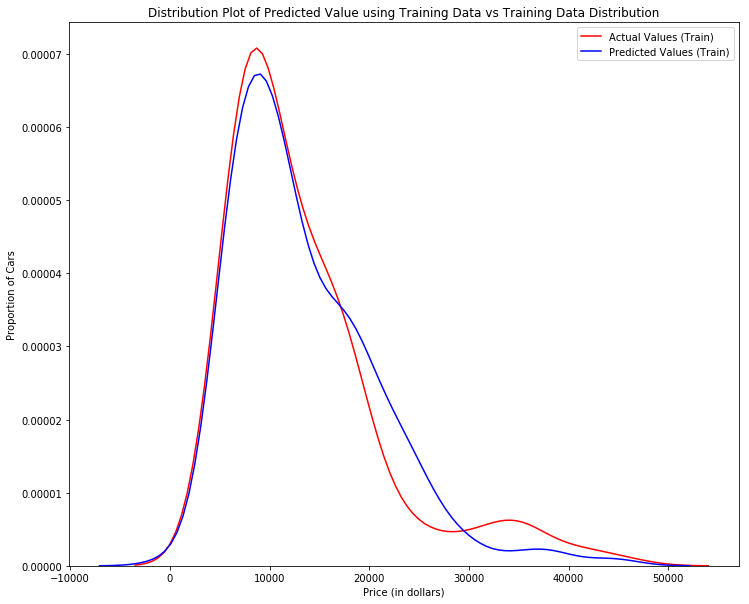

In [39]:
DistributionPlot(y_train, yhat_train, 'Actual Values (Train)', 'Predicted Values (Train)', Title)

In [40]:
# Figure above represents a plot of predicted values using training data compared to the training data

In [41]:
# so far the model seems to be doing well in learning from the trainign dataset. But what happens when the model
# encounters new data from the testing dataset?
# When the model generates new values from the test data, we see the distribution of the predicted values is much
# different from the actual traget values.

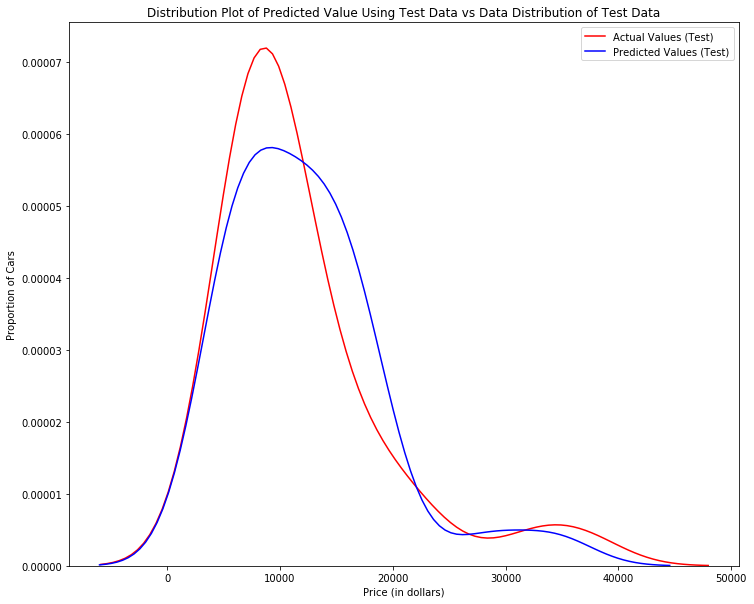

In [42]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

In [43]:
# The figure above illustrates the plot of predicted value using the test data compared to the test data

In [44]:
# Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting
# the data.
# This difference in Figure 2 is apparent where the ranges are from 50000 to 15000
# This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a
# drop in the prediction accuracy when analysing the test dataset.

In [45]:
from sklearn.preprocessing import PolynomialFeatures

# Overfitting

In [46]:
# Overfitting occurs when the model fits the noise, not the underlying process
# When testing your model using the test set, your model does not perform as well as it is modelling noise, not the
# underlying process that generated the relationship. 

# let's create a degree 5 polynomial model
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [47]:
# we will perform a degree 5 ploynomial transformation on the feature 'horse power'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [48]:
# lets create a linear regression model 'poly' and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
# we can see the output of our model using the method predict, then assign the values to 'yhat'
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([  6728.58641321,   7307.91998787,  12213.73753589,  18893.37919224,
        19996.10612156])

In [50]:
# lets take the first 5 predicted values and compare it to the actual targets
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [  6728.58641321   7307.91998787  12213.73753589  18893.37919224]
True values: [  6295.  10698.  13860.  13499.]


In [51]:
# we will use the function PollyPlot to display the training data, testing data and the predicted function

In [52]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

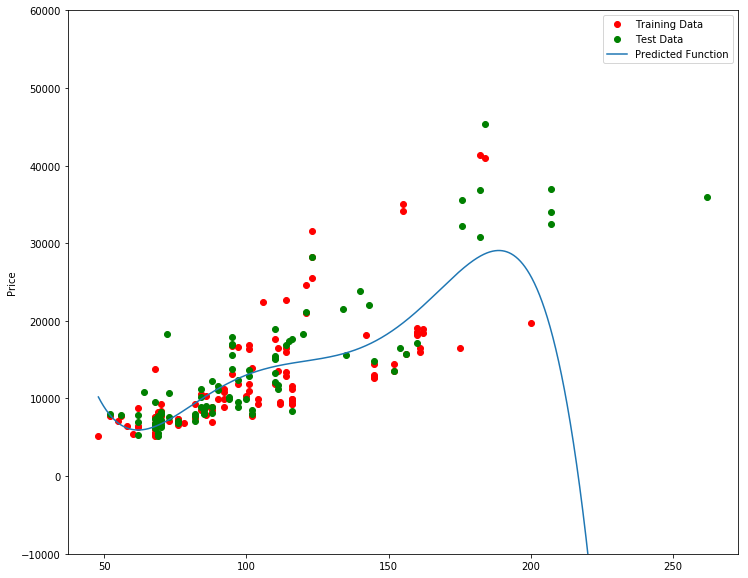

In [53]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [54]:
# figure above illustrates a polynomial regression model, red dots represent training data, 
# green dots represent test data and the blue line represents the model prediction

In [55]:
# we can see that the estimated function appears to track the data around 200 horsepower, after that
# the function begins to diverge from the data points

In [56]:
# R^2 of the training data
poly.score(x_train_pr, y_train)

0.55677168977540037

In [57]:
# R^2 of the test data
poly.score(x_test_pr, y_test)

-29.870996233872781

In [58]:
# we can see that R^2 for the training data is 0.5567 while R^2 of the test data was -29.87
# The lower the R^2 the worse model
# a negative R^2 is a sign of overfitting

Text(3,0.75,'Maximum R^2 ')

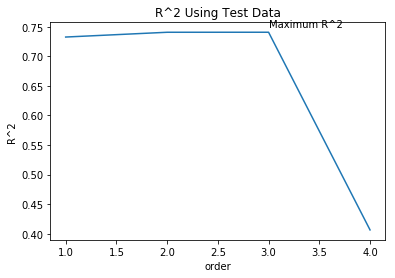

In [59]:
# let's see how R^2 changes on the test data for different order polynomials and plot the results:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

In [60]:
# we can see that R^2 gradually increases until an order three polynomial is used
# Then the R^2 dramatically decreases at four

In [61]:
# the following function will be used in the next section
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [62]:
# the following interface allows you to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Question: We can perform polynomial transformations with more than one feature. Create a 'PolynomialFeatures' object 'pr1' of degree two?

In [63]:
pr1 = PolynomialFeatures(degree=2)

Question: Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size', and 'highway-mpg'. Hint use the method fit_transform?

In [64]:
x_train_pr1 = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Question: How many dimensions does the new feature have? Hint: use the attribute "shape"

In [65]:
x_train_pr1.shape

(110, 70)

Question: Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features? 

In [66]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Question: Use the method "predict" to predict an output on the polynomial features, then use the function "Distribution Plot" to display the distribution of the predicted output vs the test data?

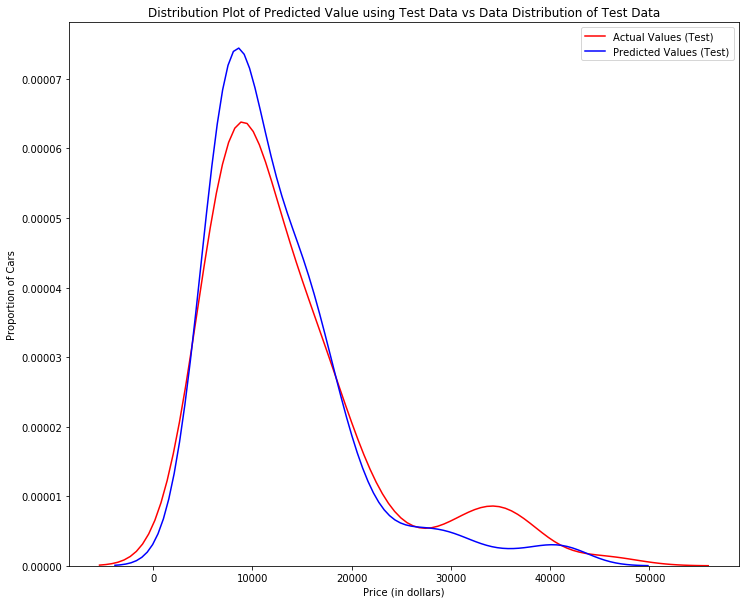

In [67]:
yhat_test1 = poly1.predict(x_train_pr1)
Title = "Distribution Plot of Predicted Value using Test Data vs Data Distribution of Test Data"
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

Question: Use the distribution plot to determine the two regions were the predicted prices are less accurate than the actual prices

In [68]:
# The predicted value is lower than actual value for cars where the price %10 000 range, conversely the predicted
# price is larger than the price cost in the $30 000 to $40 000 range.
# As such the model is not as accurate in these ranges.

# Ridge Regression

In [69]:
# with Ridge Regression we will see how the parameter Alfa changes the model
# lets perform a degree two polynomial transformation on our data

In [70]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [71]:
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [72]:
# lets import Ridge from the module linear models
from sklearn.linear_model import Ridge

In [73]:
# we create a Ridge regression object, setting the regularization parameter to 0.1

In [74]:
RidgeModel = Ridge(alpha=0.1)

In [75]:
# we can fit the model using fit method
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
# we can obtain a prediction
RidgeModel.predict(x_test_pr)

array([  6567.83081933,   9597.971514  ,  20836.22326844,  19347.69543463,
        21402.65500378,   9667.8149467 ,   9607.00214903,   7089.32643689,
        17124.90320899,   7193.28883223,  10453.27476785,  11473.07438773,
        10575.27826283,   9143.12675634,  16731.48236552,  16667.4493917 ,
         5909.09980673,  14003.20160368,   8873.1362155 ,   7110.29989088,
        11902.11946949,  10448.63730321,  46667.32471287,  10109.28868834,
         9036.34264786,   9531.4955297 ,   8415.4873743 ,   9252.85157332,
        13095.71497368,  46018.88849825,  29932.20845665,  10620.23666026,
         9617.36359049,  21010.20209267,   6592.08510426,  11525.98081326,
        14439.01644466,  15611.14828999,  10239.43094087,  16239.37174103,
         7860.23324127,  27193.3325565 ,   8794.87583199,  15038.00893686,
        17844.27013301,  11479.44074405,  17068.85339821,   7429.451936  ,
         8011.99653053,  10084.14833103,  32242.09059016,   9531.4955297 ,
         9144.62467998,  

In [77]:
yhat = RidgeModel.predict(x_train_pr)

In [78]:
# we compare the first five predicted values to our test set
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 13507.6191537   17391.53643415   6157.06278944  19492.50750907]
test set: [  6295.  10698.  13860.  13499.]


In [79]:
# we select the value of Alfa that minimizes the test error, for e.g we can use a for loop
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

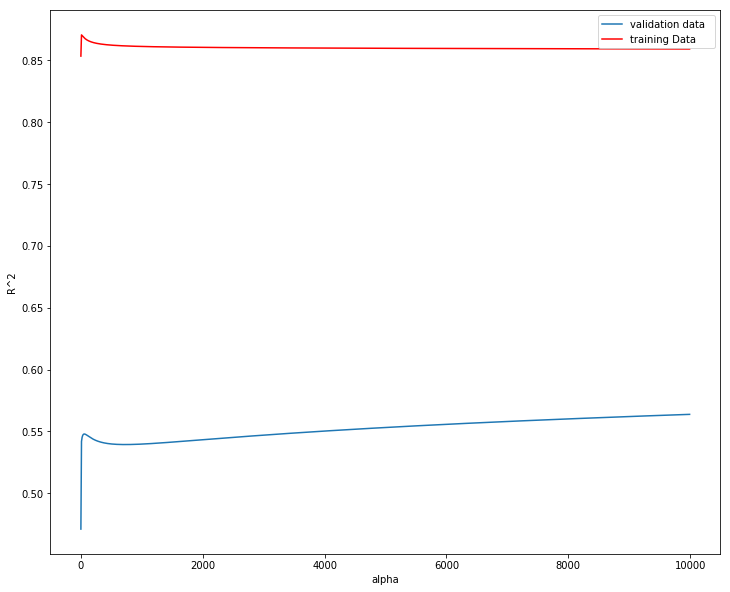

In [80]:
# we can plot out the value of R^2 for different Alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [81]:
# The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. 
# The x-axis represents the different values of Alfa 

In [82]:
# The red line in figure 6 represents the R^2 of the test data, as Alpha increases the R^2 decreases; 
# therefore as Alfa increases the model performs worse on the test data. The blue line represents the R^2 
# on the validation data, as the value for Alfa increases the R^2 decreases.

Question: Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to 10.

In [83]:
RidgeModel1 = Ridge(alpha=10)

In [84]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
RidgeModel.score(x_test_pr, y_test)

0.52672738675119113

# Grid Search

In [86]:
# the term Alpha is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best
# hyperparameter simpler

In [87]:
# we import GridSearchCV from the module model_selection
from sklearn.model_selection import GridSearchCV

In [88]:
# we create a dictionary of parameter values:
parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [89]:
# create a ridge regions object:
RR = Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
# create a ridge grid search object
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [91]:
# fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

/home/dacy/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
# the object finds the best parameter values on the validation data. 
# We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
# we now test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.84116498310361532

Question: Perform a grid search for the alpha parameter and then normalization parameter, then find the best values of parameters

In [94]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000], 'normalize': [True, False]}]
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
Grid2.best_estimator_

/home/dacy/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)